In [1]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns
import time
import graphviz
from sklearn.datasets import load_iris
from sklearn import tree
import os

In [2]:
os.environ["PATH"] += os.pathsep + 'C:\\Users\\A691602\\Desktop\\Python\\my example\\graphviz-2.38\\release\\bin'

In [3]:
#Loading data
data=pd.read_csv("HR_Employee_Attrition_Data.csv")

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# dropping columns 'EmployeeCount','EmployeeNumber','Over18', 'StandardHours'.
data=data.drop(['EmployeeCount','EmployeeNumber','Over18', 'StandardHours'],axis = 1)

In [6]:
#describing Oveall data
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,...,0.360762,1.081025,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
#To check if any null values present in data
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [8]:
#converting to int type 1 leave job 0 not leave
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0}).astype(int)

In [9]:
#describing plot if Attrition=1
data[(data['Attrition'] == 1)].describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,474.000000,474.0,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,...,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.679102,0.0,401.474454,8.443586,1.007178,1.168554,20.078699,0.772587,0.939599,1.116875,...,0.363351,1.124247,0.855456,7.161621,1.253457,0.815589,5.943691,3.171469,3.149742,3.140024
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [10]:
data[(data['Attrition'] == 1)].size

14694

In [11]:
#describing plot if Attrition=1
data[(data['Attrition'] == 0)].describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2466.000000,2466.0,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,...,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.886557,0.0,403.126584,8.011008,1.026793,1.070915,20.376620,0.691909,1.117707,1.093056,...,0.360335,1.071386,0.841814,7.759145,1.293323,0.681768,6.095061,3.648662,3.234106,3.593387
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [12]:
# to find all the Features of dataset
data.columns.values

array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [13]:
#Counting number if available for attrition vs non attrition
data['Attrition'].value_counts()

0    2466
1     474
Name: Attrition, dtype: int64

Text(0.5, 1.0, 'Attrition')

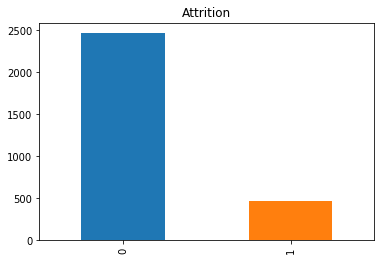

In [14]:
#plotting data attrition vs non-attrition
data['Attrition'].value_counts().plot('bar', color=('C0','C1')).set_title('Attrition')

In [15]:
#Relationship/ corelatin for people leaving job based on Age
data[["Age", "Attrition"]].groupby(['Age'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,Age,Attrition
1,19,0.666667
2,20,0.545455
0,18,0.500000
3,21,0.461538
40,58,0.357143
4,22,0.312500
8,26,0.307692
10,28,0.291667
5,23,0.285714
6,24,0.269231


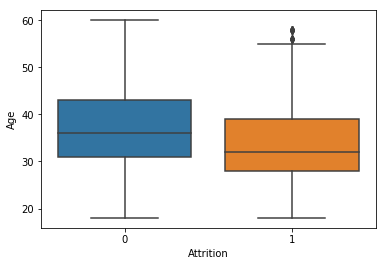

In [16]:
#Box plot for age to check median age 
sns.boxplot(y='Age', x='Attrition',data=data)

In [17]:
#Relationship/ corelatin for people leaving job based on BusinessTravel
data[["BusinessTravel", "Attrition"]].groupby(['BusinessTravel'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,BusinessTravel,Attrition
1,Travel_Frequently,0.249097
2,Travel_Rarely,0.149569
0,Non-Travel,0.080000


C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


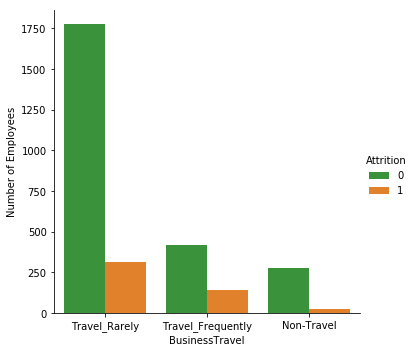

In [18]:
#sns.axes_style('whitegrid')
sns.factorplot('BusinessTravel', data=data, aspect=1, kind='count', hue='Attrition', palette=['C2', 'C1']).set_ylabels('Number of Employees')

In [19]:
#Relationship/ corelatin for people leaving job based on DailyRate
data[["DailyRate", "Attrition"]].groupby(['DailyRate'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,DailyRate,Attrition
163,360,1.0
583,1033,1.0
433,781,1.0
140,318,1.0
781,1337,1.0
776,1330,1.0
154,341,1.0
426,769,1.0
581,1030,1.0
424,763,1.0


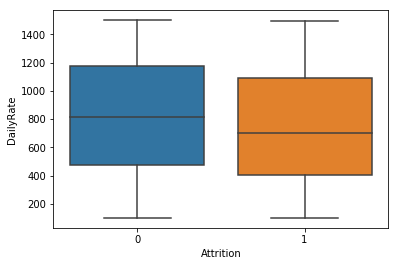

In [20]:
sns.boxplot(y='DailyRate', x='Attrition',data=data)

In [21]:
#Relationship/ corelatin for people leaving job based on Department
data[["Department", "Attrition"]].groupby(['Department'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,Department,Attrition
2,Sales,0.206278
0,Human Resources,0.190476
1,Research & Development,0.138398


C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


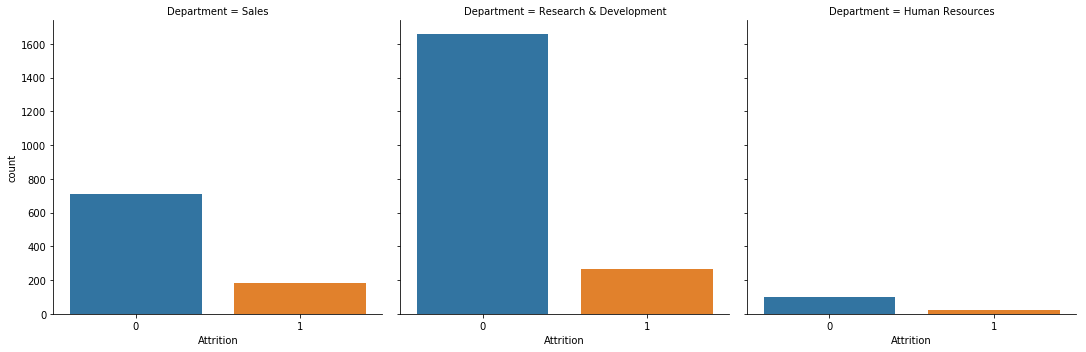

In [22]:
sns.factorplot(x='Attrition', col='Department', kind='count', data=data);

C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


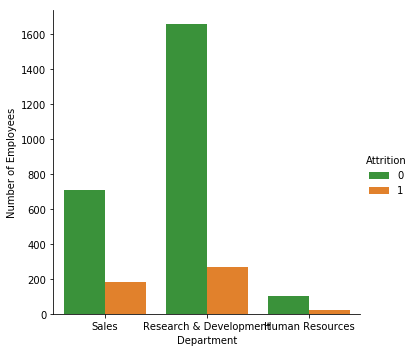

In [23]:
#sns.axes_style('whitegrid')
sns.factorplot('Department', data=data, aspect=1, kind='count', hue='Attrition', palette=['C2', 'C1']).set_ylabels('Number of Employees')

In [24]:
#Relationship/ corelatin for people leaving job based on DistanceFromHome
data[["DistanceFromHome", "Attrition"]].groupby(['DistanceFromHome'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,DistanceFromHome,Attrition
23,24,0.428571
12,13,0.315789
21,22,0.315789
11,12,0.300000
26,27,0.250000
16,17,0.250000
24,25,0.240000
15,16,0.218750
8,9,0.211765
14,15,0.192308


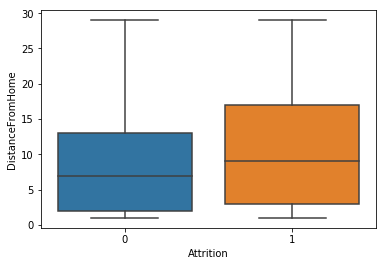

In [25]:
sns.boxplot(y='DistanceFromHome', x='Attrition',data=data)

In [26]:
#Relationship/ corelatin for people leaving job based on Education
data[["Education", "Attrition"]].groupby(['Education'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,Education,Attrition
0,1,0.182353
2,3,0.173077
1,2,0.156028
3,4,0.145729
4,5,0.104167


C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


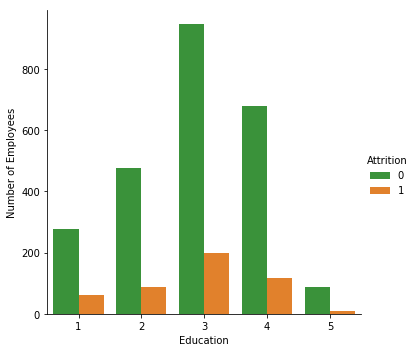

In [27]:
#sns.axes_style('whitegrid')
sns.factorplot('Education', data=data, aspect=1, kind='count', hue='Attrition', palette=['C2', 'C1']).set_ylabels('Number of Employees')

In [28]:
#Relationship for people leaving job based on EducationField
data[["EducationField", "Attrition"]].groupby(['EducationField'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,EducationField,Attrition
0,Human Resources,0.259259
5,Technical Degree,0.242424
2,Marketing,0.220126
1,Life Sciences,0.146865
3,Medical,0.135776
4,Other,0.134146


C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


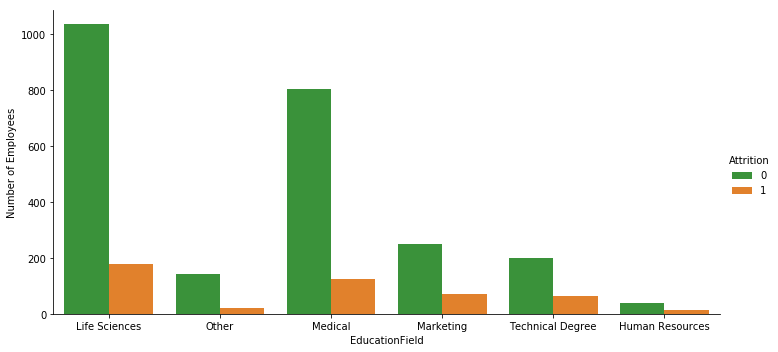

In [29]:

sns.factorplot('EducationField', data=data, aspect=2, kind='count', hue='Attrition', palette=['C2', 'C1']).set_ylabels('Number of Employees')

In [30]:
#Relationship/ corelatin for people leaving job based on EnvironmentSatisfaction
data[["EnvironmentSatisfaction", "Attrition"]].groupby(['EnvironmentSatisfaction'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,EnvironmentSatisfaction,Attrition
0,1,0.253521
1,2,0.149826
2,3,0.136865
3,4,0.134529


C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


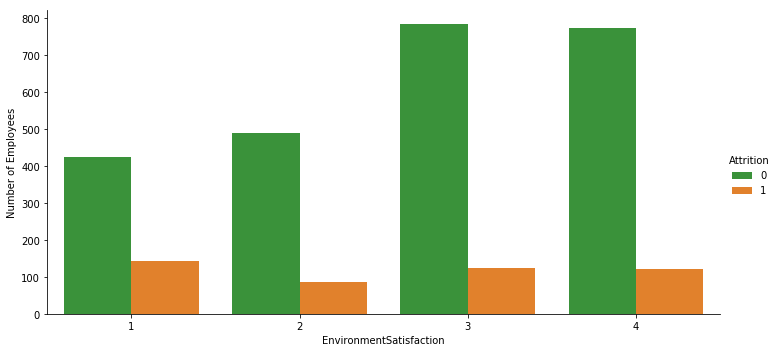

In [31]:
sns.factorplot('EnvironmentSatisfaction', data=data, aspect=2, kind='count', hue='Attrition', palette=['C2', 'C1']).set_ylabels('Number of Employees')

In [32]:
#Relationship/ corelatin for people leaving job based on Gender
data[["Gender", "Attrition"]].groupby(['Gender'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,Gender,Attrition
1,Male,0.170068
0,Female,0.147959


C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


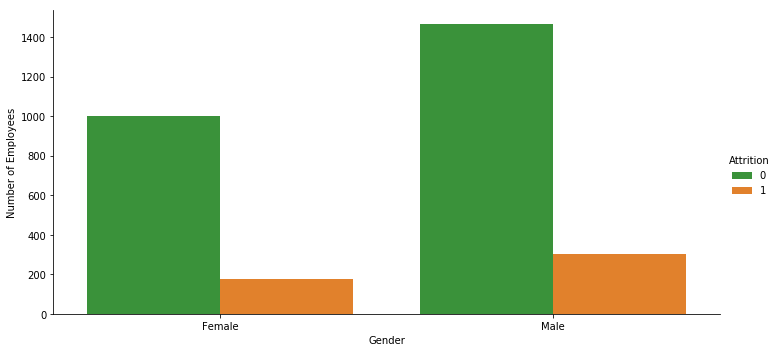

In [33]:
sns.factorplot('Gender', data=data, aspect=2, kind='count', hue='Attrition', palette=['C2', 'C1']).set_ylabels('Number of Employees')

In [34]:
#Relationship/ corelatin for people leaving job based on HourlyRate
data[["HourlyRate", "Attrition"]].groupby(['HourlyRate'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,HourlyRate,Attrition
4,34,0.416667
20,50,0.375000
40,70,0.375000
55,85,0.333333
8,38,0.307692
28,58,0.294118
6,36,0.277778
59,89,0.266667
39,69,0.266667
70,100,0.263158


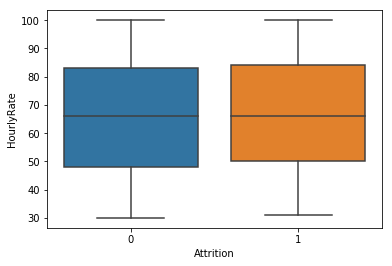

In [35]:
sns.boxplot(y='HourlyRate', x='Attrition',data=data)

In [36]:
#Relationship/ corelatin for people leaving job based on JobInvolvement
data[["JobInvolvement", "Attrition"]].groupby(['JobInvolvement'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,JobInvolvement,Attrition
0,1,0.337349
1,2,0.189333
2,3,0.144009
3,4,0.090278


C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


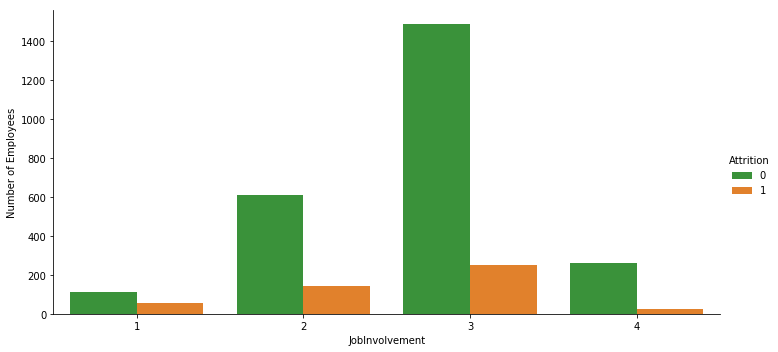

In [37]:
sns.factorplot('JobInvolvement', data=data, aspect=2, kind='count', hue='Attrition', palette=['C2', 'C1']).set_ylabels('Number of Employees')

In [38]:
#Relationship/ corelatin for people leaving job based on JobLevel
data[["JobLevel", "Attrition"]].groupby(['JobLevel'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,JobLevel,Attrition
0,1,0.263352
2,3,0.146789
1,2,0.097378
4,5,0.072464
3,4,0.047170


C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


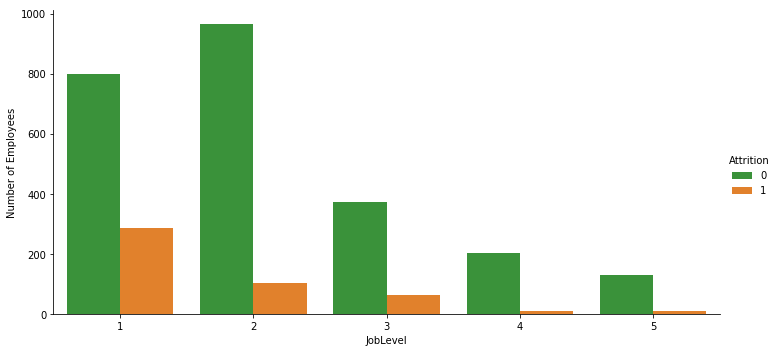

In [39]:
sns.factorplot('JobLevel', data=data, aspect=2, kind='count', hue='Attrition', palette=['C2', 'C1']).set_ylabels('Number of Employees')

In [40]:
#Relationship/ corelatin for people leaving job based on JobRole
data[["JobRole", "Attrition"]].groupby(['JobRole'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,JobRole,Attrition
8,Sales Representative,0.397590
2,Laboratory Technician,0.239382
1,Human Resources,0.230769
7,Sales Executive,0.174847
6,Research Scientist,0.160959
4,Manufacturing Director,0.068966
0,Healthcare Representative,0.068702
3,Manager,0.049020
5,Research Director,0.025000


C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


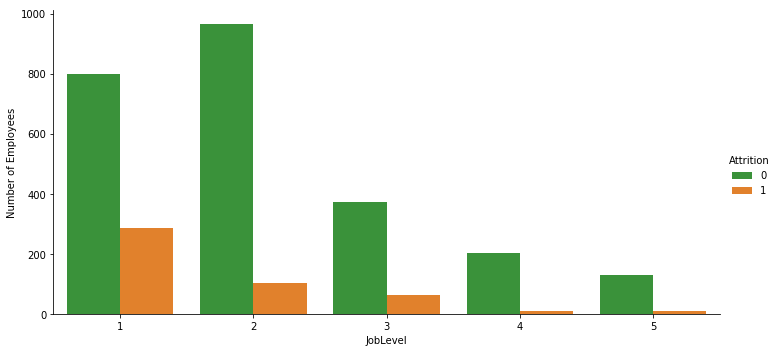

In [41]:
sns.factorplot('JobLevel', data=data, aspect=2, kind='count', hue='Attrition', palette=['C2', 'C1']).set_ylabels('Number of Employees')

In [42]:
#Relationship/ corelatin for people leaving job based on JobSatisfaction
data[["JobSatisfaction", "Attrition"]].groupby(['JobSatisfaction'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,JobSatisfaction,Attrition
0,1,0.228374
2,3,0.165158
1,2,0.164286
3,4,0.113290


C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


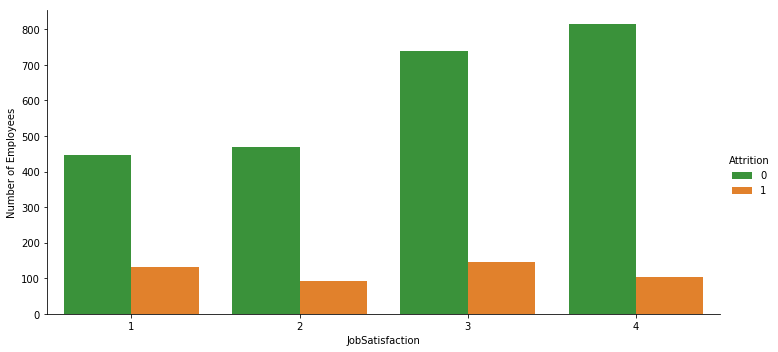

In [43]:
sns.factorplot('JobSatisfaction', data=data, aspect=2, kind='count', hue='Attrition', palette=['C2', 'C1']).set_ylabels('Number of Employees')

In [44]:
#Relationship/ corelatin for people leaving job based on MaritalStatus
data[["MaritalStatus", "Attrition"]].groupby(['MaritalStatus'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,MaritalStatus,Attrition
2,Single,0.255319
1,Married,0.124814
0,Divorced,0.100917


C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


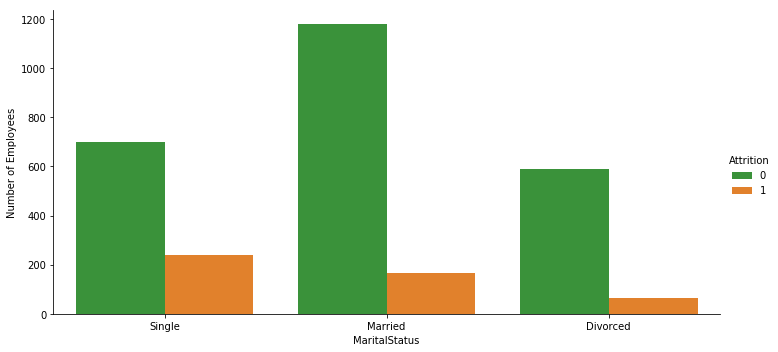

In [45]:
sns.factorplot('MaritalStatus', data=data, aspect=2, kind='count', hue='Attrition', palette=['C2', 'C1']).set_ylabels('Number of Employees')

In [46]:
#Relationship/ corelatin for people leaving job based on MonthlyIncome
data[["MonthlyIncome", "Attrition"]].groupby(['MonthlyIncome'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,MonthlyIncome,Attrition
0,1009,1.0
1051,9714,1.0
1102,10482,1.0
357,3172,1.0
355,3161,1.0
352,3140,1.0
349,3102,1.0
1111,10650,1.0
340,3041,1.0
1124,10854,1.0


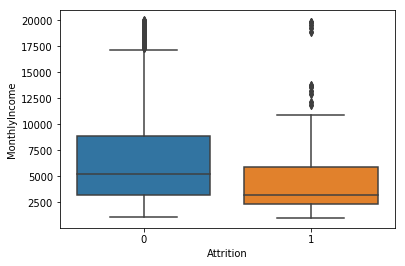

In [47]:
sns.boxplot(y='MonthlyIncome', x='Attrition',data=data)

In [48]:
#Relationship/ corelatin for people leaving job based on MonthlyRate
data[["MonthlyRate", "Attrition"]].groupby(['MonthlyRate'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,MonthlyRate,Attrition
1426,26999,1.0
397,8870,1.0
1099,21075,1.0
1100,21081,1.0
384,8658,1.0
381,8556,1.0
373,8450,1.0
1111,21199,1.0
366,8319,1.0
361,8269,1.0


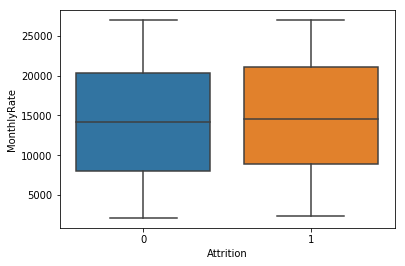

In [49]:
sns.boxplot(y='MonthlyRate', x='Attrition',data=data)

In [50]:
#Relationship/ corelatin for people leaving job based on NumCompaniesWorked
data[["NumCompaniesWorked", "Attrition"]].groupby(['NumCompaniesWorked'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,NumCompaniesWorked,Attrition
5,5,0.253968
9,9,0.230769
7,7,0.229730
6,6,0.228571
1,1,0.188100
8,8,0.122449
4,4,0.122302
0,0,0.116751
2,2,0.109589
3,3,0.100629


C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


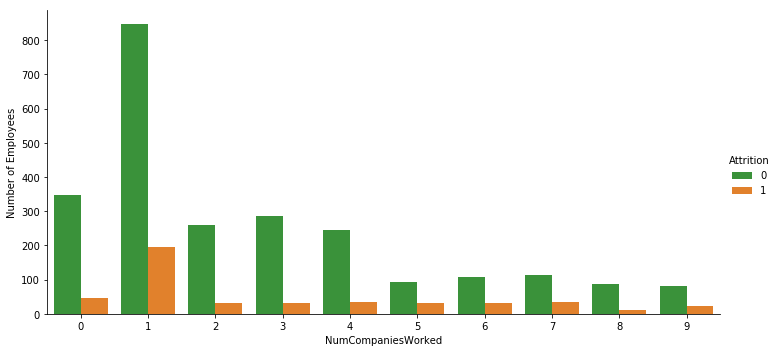

In [51]:
sns.factorplot('NumCompaniesWorked', data=data, aspect=2, kind='count', hue='Attrition', palette=['C2', 'C1']).set_ylabels('Number of Employees')

In [52]:
#Relationship/ corelatin for people leaving job based on OverTime
data[["OverTime", "Attrition"]].groupby(['OverTime'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,OverTime,Attrition
1,Yes,0.305288
0,No,0.104364


C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


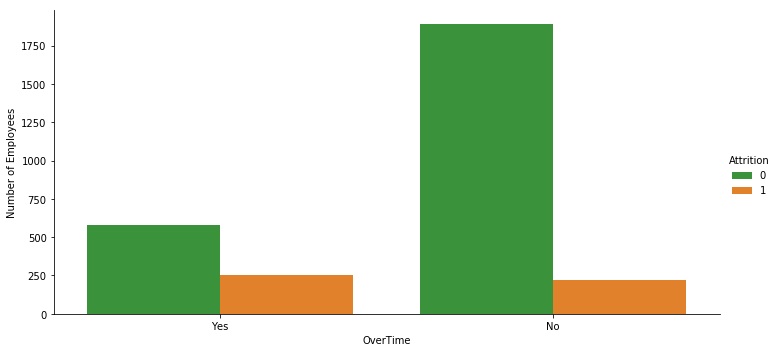

In [53]:
sns.factorplot('OverTime', data=data, aspect=2, kind='count', hue='Attrition', palette=['C2', 'C1']).set_ylabels('Number of Employees')

In [54]:
#Relationship/ corelatin for people leaving job based on PercentSalaryHike
data[["PercentSalaryHike", "Attrition"]].groupby(['PercentSalaryHike'], as_index=False).mean().sort_values(by='Attrition', ascending=False)
#data[["PercentSalaryHike", "Attrition"]].groupby(['PercentSalaryHike'], as_index=False).agg({'Attrition': ['count','mean']})

,PercentSalaryHike,Attrition
13,24,0.285714
11,22,0.214286
12,23,0.214286
0,11,0.195238
5,16,0.179487
4,15,0.178218
6,17,0.170732
1,12,0.166667
2,13,0.162679
7,18,0.146067


In [55]:
data[["PercentSalaryHike", "Attrition"]].groupby(['PercentSalaryHike'], as_index=False).agg({'Attrition': ['count','mean']})

PercentSalaryHike Attrition          
                         count      mean
0                 11       420  0.195238
1                 12       396  0.166667
2                 13       418  0.162679
3                 14       402  0.119403
4                 15       202  0.178218
5                 16       156  0.179487
6                 17       164  0.170732
7                 18       178  0.146067
8                 19       152  0.118421
9                 20       110  0.127273
10                21        96  0.104167
11                22       112  0.214286
12                23        56  0.214286
13                24        42  0.285714
14                25        36  0.055556

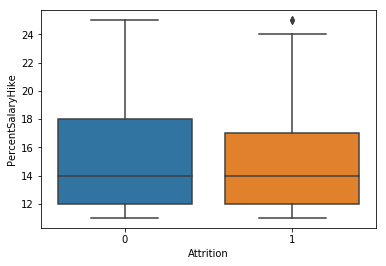

In [56]:
sns.boxplot(y='PercentSalaryHike', x='Attrition',data=data)

In [57]:
#Relationship/ corelatin for people leaving job based on PerformanceRating
data[["PerformanceRating", "Attrition"]].groupby(['PerformanceRating'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,PerformanceRating,Attrition
1,4,0.163717
0,3,0.160772


C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


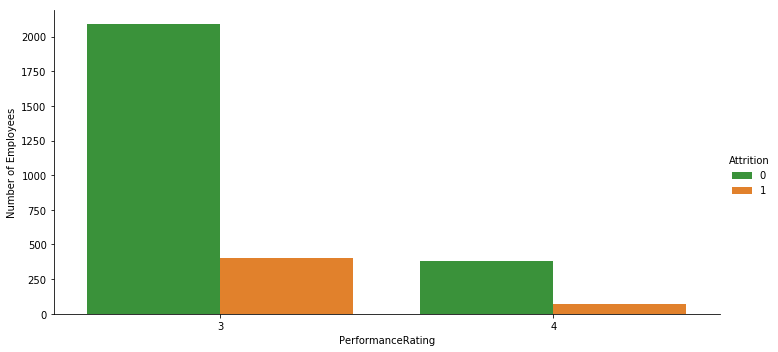

In [58]:
sns.factorplot('PerformanceRating', data=data, aspect=2, kind='count', hue='Attrition', palette=['C2', 'C1']).set_ylabels('Number of Employees')

In [59]:
#Relationship/ corelatin for people leaving job based on RelationshipSatisfaction
data[["RelationshipSatisfaction", "Attrition"]].groupby(['RelationshipSatisfaction'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,RelationshipSatisfaction,Attrition
0,1,0.206522
2,3,0.154684
1,2,0.148515
3,4,0.148148


C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


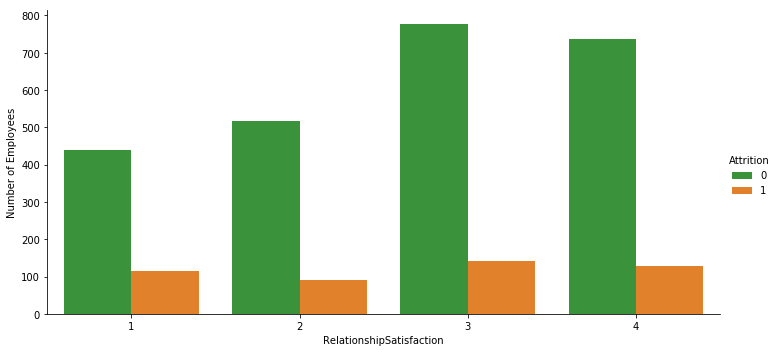

In [60]:
sns.factorplot('RelationshipSatisfaction', data=data, aspect=2, kind='count', hue='Attrition', palette=['C2', 'C1']).set_ylabels('Number of Employees')

In [61]:
#Relationship/ corelatin for people leaving job based on StockOptionLevel
data[["StockOptionLevel", "Attrition"]].groupby(['StockOptionLevel'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,StockOptionLevel,Attrition
0,0,0.244057
3,3,0.176471
1,1,0.093960
2,2,0.075949


C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


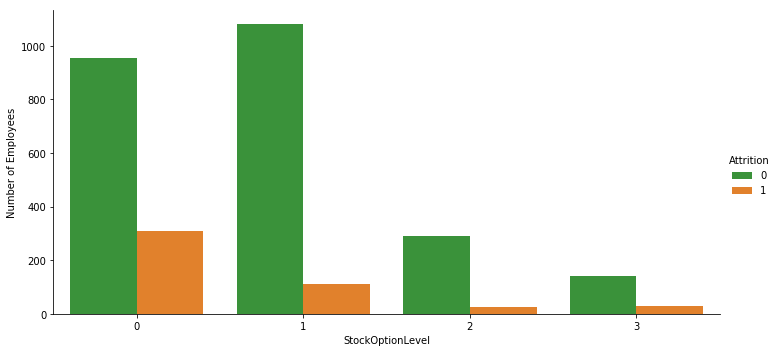

In [62]:
sns.factorplot('StockOptionLevel', data=data, aspect=2, kind='count', hue='Attrition', palette=['C2', 'C1']).set_ylabels('Number of Employees')

In [63]:
#Relationship/ corelatin for people leaving job based on StockOptionLevel
data[["TotalWorkingYears", "Attrition"]].groupby(['TotalWorkingYears'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,TotalWorkingYears,Attrition
39,40,1.000000
1,1,0.493827
0,0,0.454545
2,2,0.290323
7,7,0.222222
3,3,0.214286
34,34,0.200000
11,11,0.194444
4,4,0.190476
5,5,0.181818


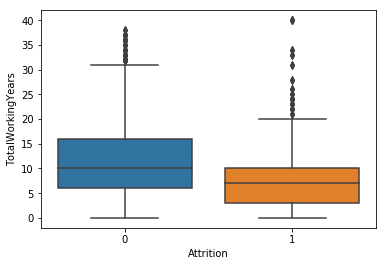

In [64]:
sns.boxplot(y='TotalWorkingYears', x='Attrition',data=data)

In [65]:
#Relationship/ corelatin for people leaving job based on TrainingTimesLastYear
data[["TrainingTimesLastYear", "Attrition"]].groupby(['TrainingTimesLastYear'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,TrainingTimesLastYear,Attrition
0,0,0.277778
4,4,0.211382
2,2,0.179159
3,3,0.140530
1,1,0.126761
5,5,0.117647
6,6,0.092308


C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


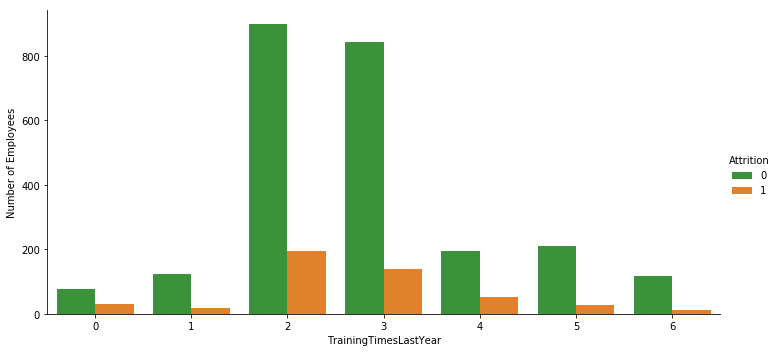

In [66]:
sns.factorplot('TrainingTimesLastYear', data=data, aspect=2, kind='count', hue='Attrition', palette=['C2', 'C1']).set_ylabels('Number of Employees')

In [67]:
#Relationship/ corelatin for people leaving job based on WorkLifeBalance
data[["WorkLifeBalance", "Attrition"]].groupby(['WorkLifeBalance'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,WorkLifeBalance,Attrition
0,1,0.312500
3,4,0.176471
1,2,0.168605
2,3,0.142217


C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


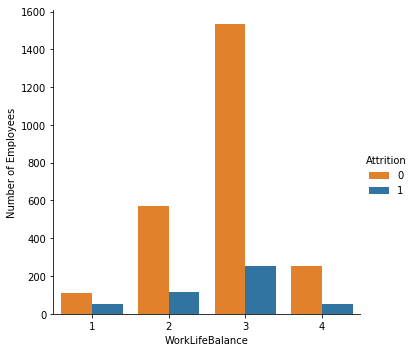

In [68]:
sns.axes_style('whitegrid')
sns.factorplot("WorkLifeBalance", data=data, aspect=1, kind='count', hue='Attrition', palette=['C1', 'C0']).set_ylabels('Number of Employees')

In [69]:
#Relationship/ corelatin for people leaving job based on YearsAtCompany
data[["YearsAtCompany", "Attrition"]].groupby(['YearsAtCompany'], as_index=False).mean().sort_values(by='Attrition', ascending=False)
#data[["YearsAtCompany", "Attrition"]].groupby(['YearsAtCompany'], as_index=False).agg({'Attrition': ['count','mean']})

,YearsAtCompany,Attrition
36,40,1.000000
23,23,0.500000
0,0,0.363636
1,1,0.345029
31,32,0.333333
30,31,0.333333
2,2,0.212598
32,33,0.200000
4,4,0.172727
24,24,0.166667


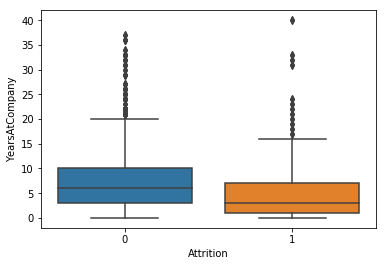

In [70]:
sns.boxplot(y='YearsAtCompany', x='Attrition',data=data)

In [71]:
#Relationship/ corelatin for people leaving job based on YearsInCurrentRole
data[["YearsInCurrentRole", "Attrition"]].groupby(['YearsInCurrentRole'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,YearsInCurrentRole,Attrition
0,0,0.299180
15,15,0.250000
1,1,0.192982
2,2,0.182796
4,4,0.144231
7,7,0.139640
3,3,0.118519
12,12,0.100000
14,14,0.090909
9,9,0.089552


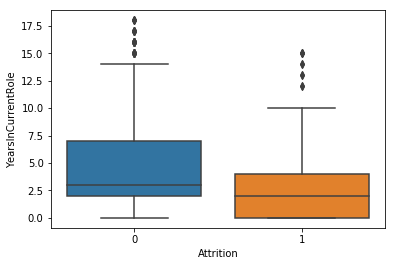

In [72]:
sns.boxplot(y='YearsInCurrentRole', x='Attrition',data=data)

In [73]:
#Relationship/ corelatin for people leaving job based on YearsSinceLastPromotion
data[["YearsSinceLastPromotion", "Attrition"]].groupby(['YearsSinceLastPromotion'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,YearsSinceLastPromotion,Attrition
9,9,0.235294
15,15,0.230769
7,7,0.210526
13,13,0.200000
0,0,0.189329
6,6,0.187500
3,3,0.173077
2,2,0.169811
10,10,0.166667
1,1,0.137255


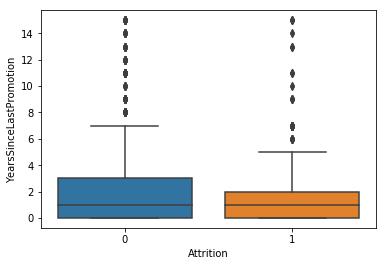

In [74]:
sns.boxplot(y="YearsSinceLastPromotion", x='Attrition',data=data)

In [75]:
#Relationship/ corelatin for people leaving job based on YearsWithCurrManager
data[["YearsWithCurrManager", "Attrition"]].groupby(['YearsWithCurrManager'], as_index=False).mean().sort_values(by='Attrition', ascending=False)

,YearsWithCurrManager,Attrition
14,14,0.400000
0,0,0.323194
2,2,0.145349
1,1,0.144737
7,7,0.143519
6,6,0.137931
3,3,0.133803
5,5,0.129032
4,4,0.112245
10,10,0.111111


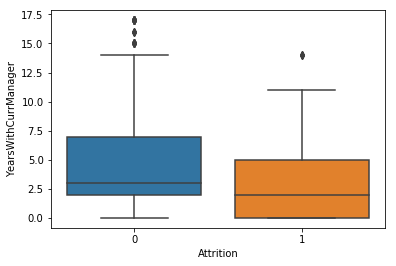

In [76]:

sns.boxplot(y='YearsWithCurrManager', x='Attrition',data=data)

# Plotting noraml distribution plot


In [77]:
#Feature encoding
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    return res_df

In [78]:
data=preprocessor(data)

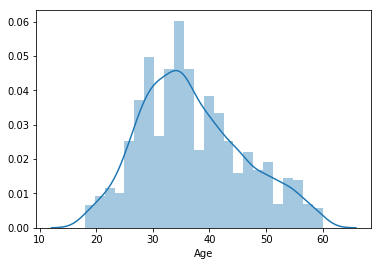

In [79]:
#Ditribution plot of age
sns.distplot(data['Age'])

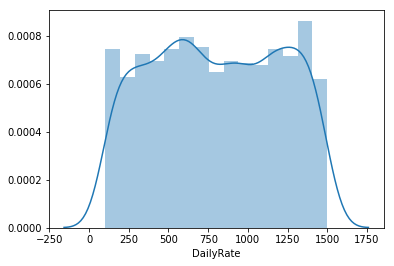

In [80]:
#Ditribution plot of DailyRate
sns.distplot(data['DailyRate'])

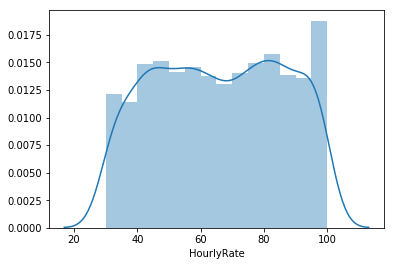

In [81]:
#Ditribution plot of HourlyRate
sns.distplot(data['HourlyRate'])

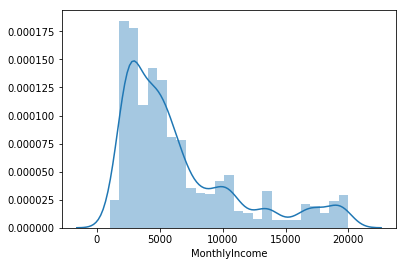

In [82]:
#Ditribution plot of MonthlyIncome'
sns.distplot(data['MonthlyIncome'])

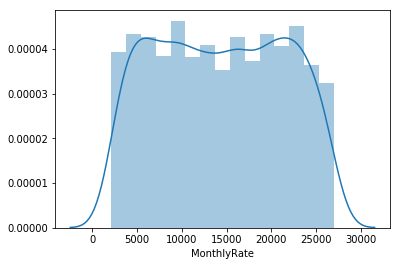

In [83]:
#Ditribution plot of MonthlyRate
sns.distplot(data['MonthlyRate'])

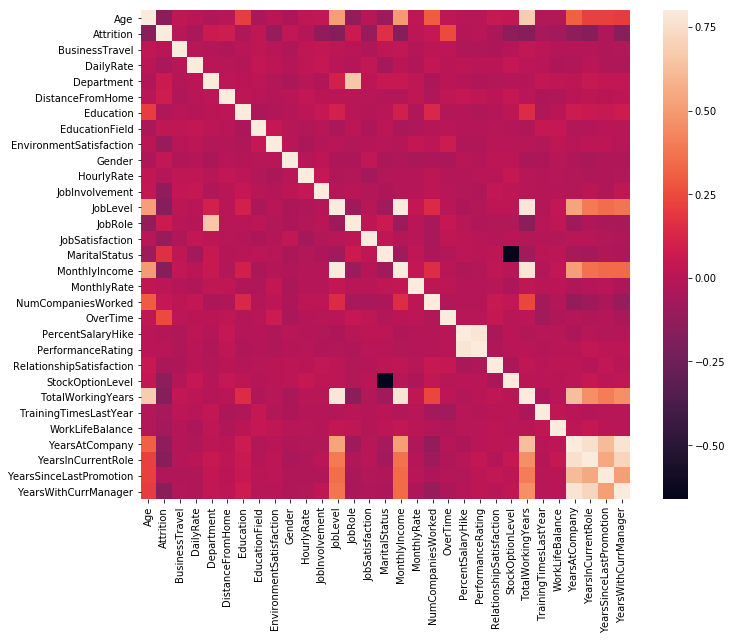

In [84]:
# Correelation Matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [85]:
#Correlation of data
df = pd.DataFrame(data)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1,-0.16,0.025,0.011,-0.032,-0.0017,0.21,-0.041,0.01,-0.036,0.024,0.03,0.51,-0.12,-0.0049,-0.095,0.5,0.028,0.3,0.028,0.0036,0.0019,0.054,0.038,0.68,-0.02,-0.021,0.31,0.21,0.22,0.2
Attrition,-0.16,1,7.4e-05,-0.057,0.064,0.078,-0.031,0.027,-0.1,0.029,-0.0068,-0.13,-0.17,0.067,-0.1,0.16,-0.16,0.015,0.043,0.25,-0.013,0.0029,-0.046,-0.14,-0.17,-0.059,-0.064,-0.13,-0.16,-0.033,-0.16
BusinessTravel,0.025,7.4e-05,1,-0.0041,-0.009,-0.024,0.00076,0.024,0.0042,-0.033,0.027,0.039,0.019,0.0027,-0.034,0.024,0.034,-0.014,0.021,0.017,-0.029,-0.026,-0.036,-0.017,0.034,0.015,-0.011,-0.015,-0.011,-0.033,-0.023
DailyRate,0.011,-0.057,-0.0041,1,0.0071,-0.005,-0.017,0.038,0.018,-0.012,0.023,0.046,0.003,-0.0095,0.031,-0.07,0.0077,-0.032,0.038,0.0091,0.023,0.00047,0.0078,0.042,0.015,0.0025,-0.038,-0.034,0.0099,-0.033,-0.026
Department,-0.032,0.064,-0.009,0.0071,1,0.017,0.008,0.014,-0.019,-0.042,-0.0041,-0.025,0.1,0.66,0.021,0.056,0.053,0.024,-0.036,0.0075,-0.0078,-0.025,-0.022,-0.012,-0.016,0.037,0.026,0.023,0.056,0.04,0.034
DistanceFromHome,-0.0017,0.078,-0.024,-0.005,0.017,1,0.021,0.002,-0.016,-0.0019,0.031,0.0088,0.0053,-0.001,-0.0037,-0.014,-0.017,0.027,-0.029,0.026,0.04,0.027,0.0066,0.045,0.0046,-0.037,-0.027,0.0095,0.019,0.01,0.014
Education,0.21,-0.031,0.00076,-0.017,0.008,0.021,1,-0.04,-0.027,-0.017,0.017,0.042,0.1,0.0042,-0.011,0.0041,0.095,-0.026,0.13,-0.02,-0.011,-0.025,-0.0091,0.018,0.15,-0.025,0.0098,0.069,0.06,0.054,0.069
EducationField,-0.041,0.027,0.024,0.038,0.014,0.002,-0.04,1,0.043,-0.0025,-0.022,-0.0027,-0.045,0.016,-0.034,0.014,-0.041,-0.027,-0.0087,0.0023,-0.011,-0.0056,-0.0044,-0.016,-0.028,0.049,0.041,-0.019,-0.011,0.0023,-0.0041
EnvironmentSatisfaction,0.01,-0.1,0.0042,0.018,-0.019,-0.016,-0.027,0.043,1,0.00051,-0.05,-0.0083,0.0012,-0.017,-0.0068,-0.0036,-0.0063,0.038,0.013,0.07,-0.032,-0.03,0.0077,0.0034,-0.0027,-0.019,0.028,0.0015,0.018,0.016,-0.005
Gender,-0.036,0.029,-0.033,-0.012,-0.042,-0.0019,-0.017,-0.0025,0.00051,1,-0.00048,0.018,-0.039,-0.04,0.033,-0.047,-0.032,-0.041,-0.039,-0.042,0.0027,-0.014,0.023,0.013,-0.047,-0.039,-0.0028,-0.03,-0.041,-0.027,-0.031


In [86]:
#splitting dependent and target variables
x = data.drop(['Attrition'],axis =1).values
y = data['Attrition'].values

# Model Building

In [87]:
#Splitting the test and train set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

In [103]:
model_dt_GridSearchCV = DecisionTreeClassifier(random_state=1)

In [104]:
#Hyper-Parameter Optimization using GridSearchCV
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [5,6,7,8,9,10,11,12,13,14,15],
              'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,11,12],
              'min_samples_split':[50,60,70,80,90,100,120,130,140,150],
              'criterion': ['gini']}

cv_rf = GridSearchCV(model_dt_GridSearchCV, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train,y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 90}
Time taken in grid search:  122.98


In [116]:
# Applying the Best Parameters using grid search:
data_dt_8 = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf= 8, min_samples_split= 90)
data_dt_8.fit(x_train, y_train)
data_dt_8_score_train = data_dt_8.score(x_train, y_train)
print("Training score: ",data_dt_8_score_train)
data_dt_8_score_test = data_dt_8.score(x_test, y_test)
print("Testing score: ",data_dt_8_score_test)

Training score:  0.8792517006802721
Testing score:  0.8469387755102041


# Performance Metrics

In [117]:
y_pred_dt = data_dt_8.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [118]:
predictions = data_dt_8.predict(x_test)
# Model Accuracy
print (data_dt_8.score(x_test, y_test))
y_actual_result = y_test[0]

0.8469387755102041


In [119]:
predictions

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [120]:
y_test

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

# Area under curve

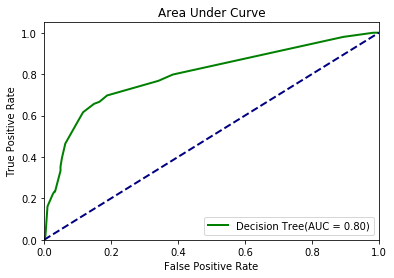

In [121]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix

In [122]:
print (confusion_matrix(y_test, predictions))

[[465  24]
 [ 66  33]]


In [123]:
accuracy_score(y_test, predictions)

0.8469387755102041

In [124]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

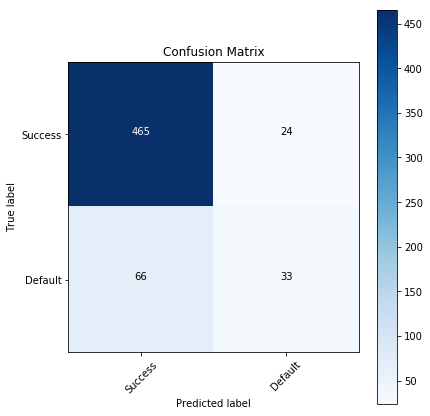

In [125]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

In [126]:
dot_data = tree.export_graphviz(data_dt_8, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")


'iris.pdf'

In [127]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

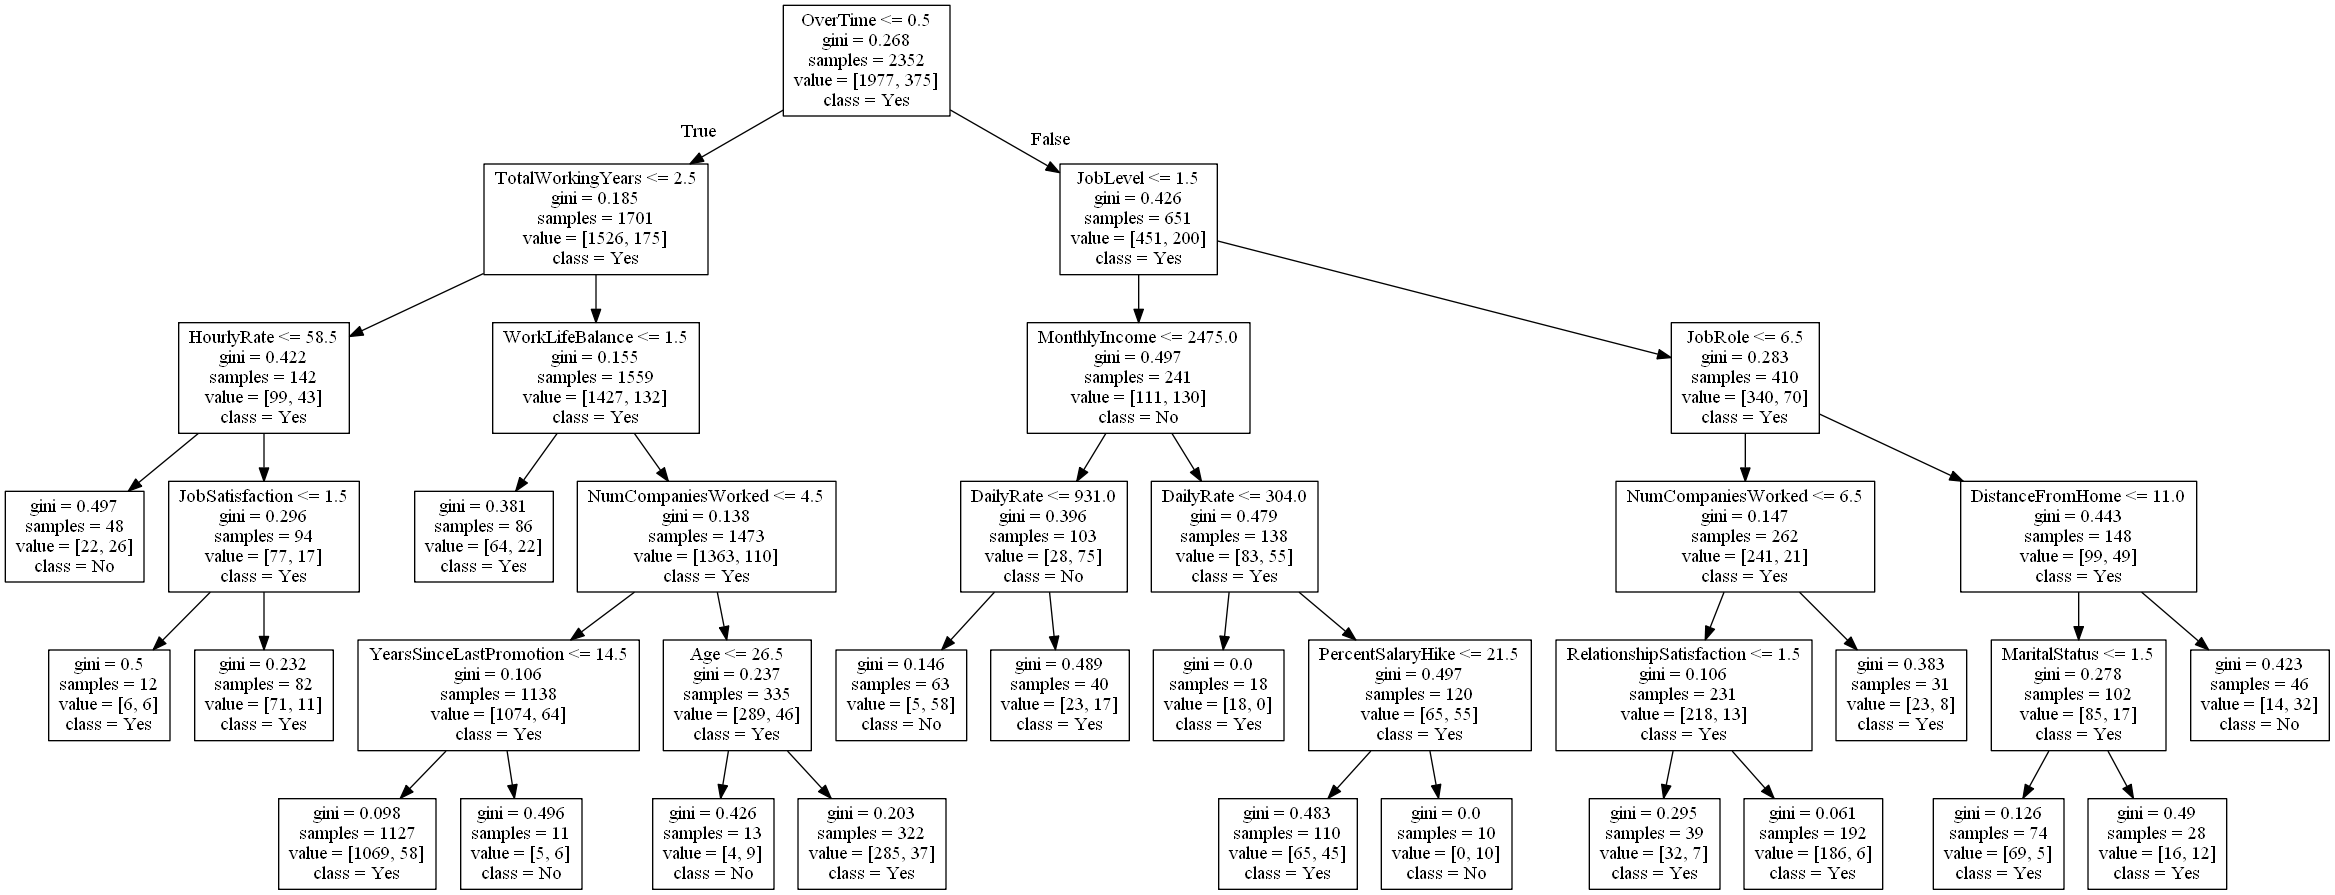

In [128]:
dot_data = tree.export_graphviz(data_dt_8, out_file=None, 
                                feature_names = ['Age', 'BusinessTravel', 'DailyRate', 'Department','DistanceFromHome', 'Education', 'EducationField','EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement','JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime','PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager'], class_names = ["Yes", "No"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [130]:
data_dt_8.feature_importances_

array([0.0410765 , 0.        , 0.09168197, 0.        , 0.08747179,
       0.        , 0.        , 0.        , 0.        , 0.04078829,
       0.        , 0.20343264, 0.05871688, 0.01381549, 0.02610342,
       0.0631786 , 0.        , 0.02774748, 0.19383612, 0.03156   ,
       0.        , 0.00702348, 0.        , 0.06106801, 0.        ,
       0.02628759, 0.        , 0.        , 0.02621173, 0.        ])